## Assignmt: Linear Regression and Regularization

In this notebook, we'll explore the effect of different regularization techniques (Lasso, Ridge, and ElasticNet) on the coefficients of a linear regression model using the `diabetes` dataset from `sklearn.datasets`.

#### Descriptive answers should be short. One or two sentences each.
#### Keep the code clean with good comments
#### Make sure that your code output is included in your submission

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing

import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
# For the assignment:
# don't change anything in this section other than degree = 1

# After finishing the assignment, you can experiment with the scaling and other parts
# for your own learning and practice
# Load the diabetes dataset
Data = load_diabetes()

# Load the California Housing dataset
# This is if you want a second data set to experiment with
#Data = fetch_california_housing()


y = Data.target
X = pd.DataFrame(Data.data, columns=Data.feature_names)

scaler = MaxAbsScaler()  # to set the data range for each axis between -1 and 1 
# Careful here. Fit only on train data
# fit_transform calculate the scaling factors and scal the data at the same time
X = scaler.fit_transform(X) 
X = (X+1)/2 # This shift the range of the data to be between 0 and 1


# Create polynomial features
degree = 3
poly = PolynomialFeatures(degree, include_bias=False) # include_bias=False prevents adding an era dimenstion for the intercept
X = poly.fit_transform(X)
# for degree =1, X remains the same




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Normalize the data
#scaler = StandardScaler() # to set the mean of each feature at zero and the standard deviation at 1
#scaler = MaxAbsScaler()  # to set the data range for each axis between -1 and 1 

# Careful here. Fit only on train data
# fit_transform calculate the scaling factors and scal the data at the same time
#X_train = scaler.fit_transform(X_train) 

# transform just scal the data using the calculated scaling factors
#X_test = scaler.transform(X_test)

In [ ]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [ ]:
X_train.shape, X_test.shape

((265, 10), (177, 10))

In [ ]:
print(Data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

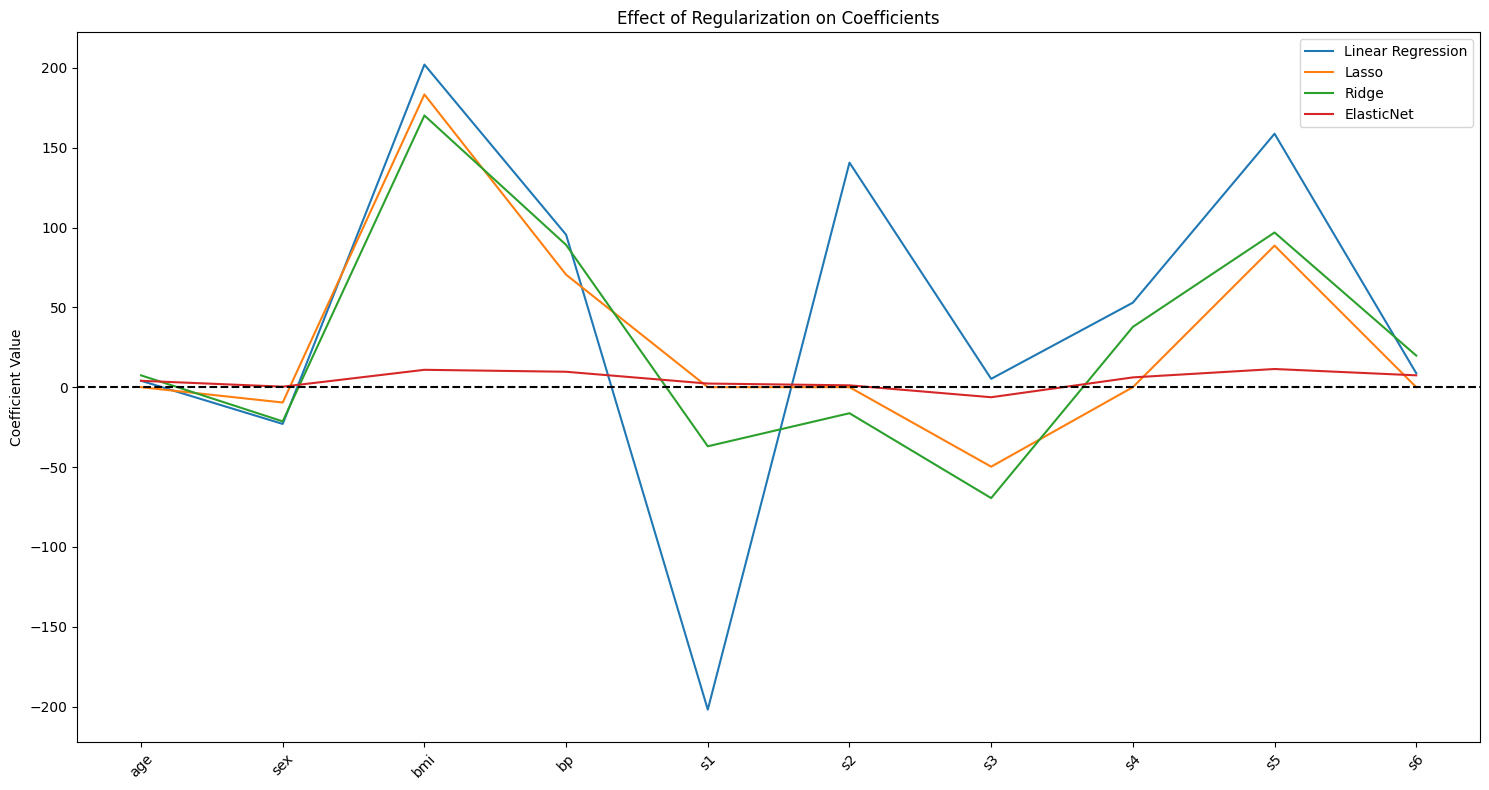

In [ ]:
# Initialize and fit the models

# note when you set degree >1, you have more features than feature names
# This will give an error in the plot due to not having enough labels/names for the features

lr = LinearRegression()
lasso = Lasso(1)
ridge = Ridge(1)
elastic_net = ElasticNet()



lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

# Get coefficients
coefs = {
    'Linear Regression': lr.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
    'ElasticNet': elastic_net.coef_
}

# Plot the coefficients
plt.figure(figsize=(15, 8))
for model, coef in coefs.items():
    plt.plot(coef, label=model)

plt.axhline(0, color='black', linestyle='--')
plt.xticks(np.arange(X.shape[1]), Data.feature_names, rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Effect of Regularization on Coefficients')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Notice that Lasso (L1) have set few coef (theta) to zero.

In [ ]:
# Q1 
# For degree =1:


# what are the three most important features to the disease progression?
"""The most important features are: bmi, s3, and s5."""

# Which regulization method tends to remove features from playing any role in the predictive model?
"""Lasso regularization model, L1 tends to push the values of the variable coefficients toward zero, due to the constraint having the form of an absolute value."""

# What features do you anticipate to play no role in the disease progression?
"""age, sex, s1, s2, s4, and s6."""

In [ ]:
from sklearn.metrics import mean_squared_error


# Predict using each model on the test set and compute MSE
mse_values = {
    "Linear Regression": mean_squared_error(y_test, lr.predict(X_test)),
    "Lasso": mean_squared_error(y_test, lasso.predict(X_test)),
    "Ridge": mean_squared_error(y_test, ridge.predict(X_test)),
    "ElasticNet": mean_squared_error(y_test, elastic_net.predict(X_test))
}

mse_values

for key, value in mse_values.items():
    print(f"{key}:  {round(value,4)}")

Linear Regression:  2832.9962
Lasso:  2993.5889
Ridge:  2842.7819
ElasticNet:  5234.2802


In [ ]:
# Q2

# For alpha=1 (the regulization strength), the linear regression performed better without regulization
# We want to explore the optimal value of the regulization strength

# Create a data frame that has four columns, alpha, Lasso, Ridge, linear
# Initialize DataFrame to store results
df = pd.DataFrame(columns=['Alpha', 'Lasso', 'Ridge', 'Linear'])
alphas = [0, 0.003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.8, 1, 1.2, 3, 10, 30, 100, 300, 1000, 10000, 100000, 1000000]
df['Alpha'] = alphas

# X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Calculate MSE for Linear Regression for reference

mse_lr = mse_values['Linear Regression']

# Loop through each alpha value
for i, alpha in enumerate(alphas):#will enumerate through this list, providing both the index (i) and the value (alpha) for each loop iteration
    
    # For Lasso
    lasso = Lasso(alpha=alpha)#I want to control how much it should avoid overfitting using this alpha value.
    lasso.fit(X_train, y_train)
    mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))
    
    
    # For Ridge
    ridge = Ridge(alpha=alpha)#I want to control how much it should avoid overfitting using this alpha value.
    ridge.fit(X_train, y_train)
    mse_ridge = mean_squared_error(y_test, ridge.predict(X_test))
    
    # Update the DataFrame
    df.loc[i, 'Lasso'] = mse_lasso
    df.loc[i, 'Ridge'] = mse_ridge
    df.loc[i, 'Linear'] = mse_lr  # This value stays the same for each row

# Show the DataFrame
print(df)


# populate the alpha column with values :
#[0,0.003,0.001,0.003,0.01,0.03,0.1,0.3,0.8,1,1.2,3,10,30,100,300,1000,10000,100000,1000000]
# and calculate the mean_squared_error (using the test data set) for Lasso, Ridge for each value of alpha 
# Note incluade the mean_squared_error in the data frame for reference

          Alpha        Lasso        Ridge      Linear
0         0.000   2832.99624   2832.99624  2832.99624
1         0.003  2835.095268  2834.433899  2832.99624
2         0.001  2834.106194  2833.490144  2832.99624
3         0.003  2835.095268  2834.433899  2832.99624
4         0.010  2840.476745  2837.320908  2832.99624
5         0.030  2859.574378  2842.943989  2832.99624
6         0.100  2866.710173  2849.503201  2832.99624
7         0.300  2876.733435  2847.409427  2832.99624
8         0.800  2954.973738  2841.508653  2832.99624
9         1.000  2993.588893  2842.781925  2832.99624
10        1.200  3040.588315  2845.831545  2832.99624
11        3.000  3587.086216  2919.228343  2832.99624
12       10.000  5857.841951    3330.4154  2832.99624
13       30.000  5857.841951  4105.305551  2832.99624
14      100.000  5857.841951  5011.682741  2832.99624
15      300.000  5857.841951  5514.312937  2832.99624
16     1000.000  5857.841951  5745.996459  2832.99624
17    10000.000  5857.841951

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.905e+05, tolerance: 1.585e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

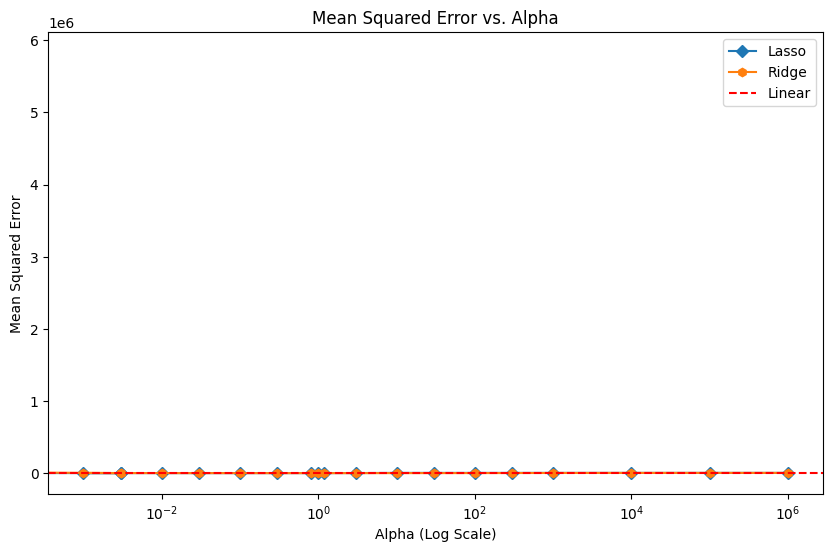

In [ ]:
# Q3
# plot the results (mean_squared_error as a function of alpha) for Lasso and for Ridge.
# Note: use log scale for alpha in your visualization


plt.figure(figsize=(10, 6))

# Plotting MSE vs alpha for Lasso and Ridge Regression
plt.plot(df['Alpha'], df['Lasso'], label='Lasso', marker='D')
plt.plot(df['Alpha'], df['Ridge'], label='Ridge', marker='h')

# Also, plot the Linear Regression MSE for reference
plt.axhline(y=df['Linear'][0], color='r', linestyle='--', label='Linear')

# Adding title and labels
plt.title('Mean Squared Error vs. Alpha')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Set x-axis to log scale

# Adding legend
plt.legend()

# Show plot
plt.show()


In [ ]:
# Q5
# From the data frame, find the optimal alpha for regulization for both Lasso and Ridge.
optimal_alpha_lasso = df[df['Lasso'] == df['Lasso'].min()]['Alpha'].values[0]
optimal_alpha_ridge = df[df['Ridge'] == df['Ridge'].min()]['Alpha'].values[0]
# print(optimal_alpha_ridge)
# print(optimal_alpha_lasso)
print(f"Optimal alpha for Lasso is: {optimal_alpha_lasso:.4f}")
print(f"Optimal alpha for Ridge is: {optimal_alpha_ridge:.4f}")

# What is it?

"""A very small alpha value (close to zero) indicates that the data are well-suited for linear regression without much regularization.
A large alpha indicates that the model requires more rigorous regularization, possibly because the features are highly correlated (Ridge) or irrelevant (Lasso)."""


# What does that mean to the data and the linear model

"""An optimal alpha for Lasso (L1 regularization) will reduce some feature coefficients to zero, effectively excluding them from the model.
An optimal alpha for Ridge (L2 regularization) will restrict the magnitude of the coefficients without setting them to zero."""


Optimal alpha for Lasso is: 0.0000
Optimal alpha for Ridge is: 0.0000


'An optimal alpha for Lasso (L1 regularization) will reduce some feature coefficients to zero, effectively excluding them from the model.\nAn optimal alpha for Ridge (L2 regularization) will restrict the magnitude of the coefficients without setting them to zero.'

In [ ]:
# Q6
# For large values of alpha,we notice flat line.
# why is that? Hint Think about the regulization loss function

"""When the regularization term (alpha) is large, both Lasso and Ridge regularization methods will heavily penalize large coefficients in the model. This is how they combat overfitting.

In the case of Lasso (L1 regularization), a large alpha may drive many coefficients to zero, essentially removing them from the model.

In the case of Ridge (L2 regularization), a large alpha will drive the coefficients close to zero but not exactly zero.""" 

In [ ]:
# Q7
# set degree = 3
# This will create hundreds of features
# Create a data frame similar to before for alpha values in 
# [0.003,0.001,0.003,0.01,0.03,0.1,0.3,0.8,1,1.2,3,10,30,100,300,1000,10000,100000,1000000]
# plot the results


df = pd.DataFrame(columns=['Alpha', 'Lasso', 'Ridge', 'Linear'])
alphas = [0, 0.003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.8, 1, 1.2, 3, 10, 30, 100, 300, 1000, 10000, 100000, 1000000]
df['Alpha'] = alphas

# X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Calculate MSE for Linear Regression for reference

mse_lr = mse_values['Linear Regression']

# Loop through each alpha value
for i, alpha in enumerate(alphas):#will enumerate through this list, providing both the index (i) and the value (alpha) for each loop iteration
    
    # For Lasso
    lasso = Lasso(alpha=alpha)#I want to control how much it should avoid overfitting using this alpha value.
    lasso.fit(X_train, y_train)
    mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))
    
    
    # For Ridge
    ridge = Ridge(alpha=alpha)#I want to control how much it should avoid overfitting using this alpha value.
    ridge.fit(X_train, y_train)
    mse_ridge = mean_squared_error(y_test, ridge.predict(X_test))
    
    # Update the DataFrame
    df.loc[i, 'Lasso'] = mse_lasso
    df.loc[i, 'Ridge'] = mse_ridge
    df.loc[i, 'Linear'] = mse_lr  # This value stays the same for each row

# Show the DataFrame
print(df)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.351e+05, tolerance: 1.585e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

          Alpha        Lasso           Ridge      Linear
0         0.000  3862.251147  5822521.497273  2832.99624
1         0.003  3417.707739     3657.458857  2832.99624
2         0.001  3683.739612     4515.279523  2832.99624
3         0.003  3417.707739     3657.458857  2832.99624
4         0.010  3000.902279     3169.260135  2832.99624
5         0.030  2772.913769      2972.23199  2832.99624
6         0.100  2812.008667     2836.410613  2832.99624
7         0.300  2870.708181     2764.035681  2832.99624
8         0.800   2951.21134     2755.948593  2832.99624
9         1.000  2999.904278     2760.042484  2832.99624
10        1.200  3048.275872     2764.510928  2832.99624
11        3.000   3594.66187     2795.888976  2832.99624
12       10.000  5857.841951     2846.440152  2832.99624
13       30.000  5857.841951      2945.18149  2832.99624
14      100.000  5857.841951     3284.317033  2832.99624
15      300.000  5857.841951     3915.844352  2832.99624
16     1000.000  5857.841951   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+03, tolerance: 1.585e+02
  model = cd_fast.enet_coordinate_descent(


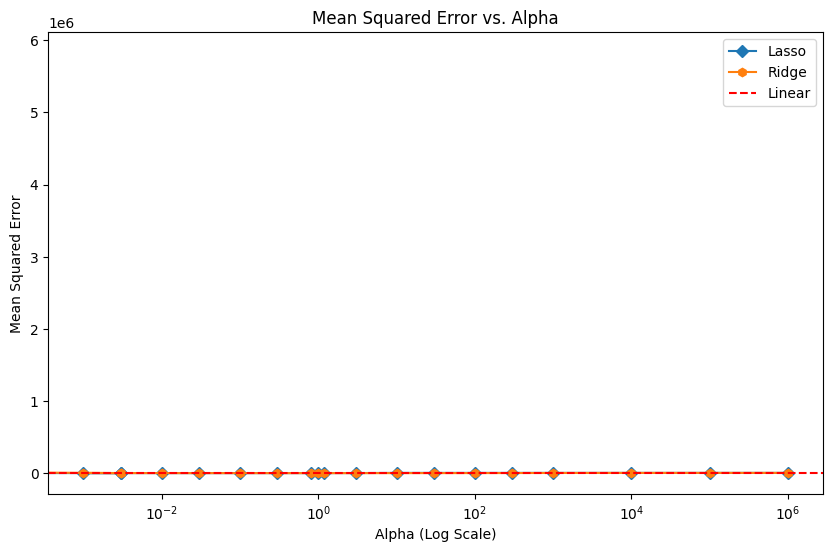

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting MSE vs alpha for Lasso and Ridge Regression
plt.plot(df['Alpha'], df['Lasso'], label='Lasso', marker='D')
plt.plot(df['Alpha'], df['Ridge'], label='Ridge', marker='h')

# Also, plot the Linear Regression MSE for reference
plt.axhline(y=df['Linear'][0], color='r', linestyle='--', label='Linear')

# Adding title and labels
plt.title('Mean Squared Error vs. Alpha')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Set x-axis to log scale

# Adding legend
plt.legend()

# Show plot
plt.show()

In [ ]:
# Q8
# compare the mean_squared_error of the lincear model for degree = 3 with the
# previous value (for degree = 1)
# What does that indicate for the (degree = 3)-case?
"""it means that making the model more complicated (by raising the degree) doesn't help make better predictions."""


In [ ]:
# Q9 
# find the optimal value of alpha and the corresponding value of  for Ridge and Lasso
# compre the corresponding mean_square _error

# From the data frame, find the optimal alpha for regulization for both Lasso and Ridge.
optimal_alpha_lasso = df[df['Lasso'] == df['Lasso'].min()]['Alpha'].values[0]
optimal_alpha_ridge = df[df['Ridge'] == df['Ridge'].min()]['Alpha'].values[0]
print(f"Optimal alpha for Lasso is: {optimal_alpha_lasso:.4f}")
print(f"Optimal alpha for Ridge is: {optimal_alpha_ridge:.4f}")

Optimal alpha for Lasso is: 0.0300
Optimal alpha for Ridge is: 0.8000


In [ ]:
# Q10
# Find the value of alpha that gives the optimal mean_squared_error for each of Ridge and Lasso
# compare the corresponding mean_square _error with the mean_square _error value for the (degree=1) case
# what does that mean (answer with few words only)

"""When degree=1, optimal alpha for Lasso and Ridge is 0. This shows that regularization is not 
enhancing the model, converting it into a linear regression model. The model is unlikely to overfit 
the data, hence regularization is unnecessary.
Maximum alpha for Lasso is 0.0300 and for Ridge is 0.8000 for degree=3. The model performs better after 
regularization, as shown by the non-zero alpha values. This suggests that the degree=3 polynomial model 
may be overfitting and that regularization helps.
"""

In [109]:
# Q11
# bonus question
# This will give you one extra point, but its not required to do
# for degree =3
# use elastic net and create a grid of  values of the  alpha and l1_ratio
# for each pair of values (alpha, l1_ratio): calculate mean_square error
# find the optimal model
# plot a contour of mean_square erroras a function of the adjustable parameters (alpha, l1_ratio)
# use log scaling where appropriate


